In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Loss Function
- I am currently using Mean Squared Error (MSE): $\mathcal{L}(\hat{y}, y)=\frac{1}{2}(\hat{y}-y)^2$.
- The gradient is given as: $\nabla_{\hat{y}}\mathcal{L}=\hat{y}-y$

In [ ]:
def loss_function(y_hat,y):  #L
    y_hat = np.array(y_hat)
    y = np.array(y)
    return 0.5 * (y_hat - y)**2


def grad_L(y_hat,y):

    return y_hat - y

### Mirror Descent Update:
The mirror descent update involves a proximal step which is different from standard gradient descent. The update rule is given by:
$$
W_{\text {new }}=\nabla \Phi^*\left(\nabla \Phi\left(W_{\text {old }}\right)-\eta \nabla_W L\right)
$$

Here, $\eta$ is the learning rate, $\nabla \Phi$ and $\nabla \Phi^*$ are the gradients of the mirror map and its conjugate, and $\nabla_W L$ is the gradient of the loss with respect to the weights $W$ (i.e., $W^{(1)}$ and $W^{(2)}$ ).

In [ ]:
def mirror_descent_update(W_old, grad_phi_W, inverse_mirror_map, grad_L_W, eta):
    """
    Perform a mirror descent update.

    :param W_old: Current value of theta.
    :param grad_phi_W: Function to compute the gradient of the mirror map at W.
    :param inverse_mirror_map: Function to compute the inverse of the gradient of the mirror map.
    :param grad_L_W: Gradient of the loss function w.r.t. W.
    :param eta: Learning rate.
    :return: Updated W.
    """
    # Gradient step
    z = grad_phi_W(W_old) - eta * grad_L_W

    # Update via the conjugate of the mirror map
    W_new = inverse_mirror_map(z)
    return W_new

### These are the functions for the negative entropy mirror map

In [ ]:
def grad_entropy_mirror_map(W):
    """ Gradient of the negative entropy mirror map. """
    return np.log(W) + 1

def grad_inverse_entropy_mirror_map(z):
    """ Inverse of the gradient of the negative entropy mirror map. """
    return np.exp(z - 1)

### These are the functions for the norm squared mirror map

The mirror map $\Phi$ being the Euclidean norm squared can be defined as:
$$
\Phi(\theta)=\frac{1}{2}\|\theta\|^2
$$

This function is convex, and its gradient is simply the identity function:
$$
\nabla \Phi(\theta)=\theta
$$

Gradient of the Mirror Map's Conjugate
The convex conjugate $\Phi^*$ of $\Phi$ would also be the Euclidean norm squared due to the self-duality of the $L_2$ norm. The gradient of the convex conjugate $\nabla \Phi^*$ would then also be the identity function:
$$
\nabla \Phi^*(\theta)=\theta
$$

Mirror Descent Update Rule
Given these, the mirror descent update rule:
$$
\theta_{\text {new }}=\nabla \Phi^*\left(\nabla \Phi\left(\theta_{\text {old }}\right)-\eta \nabla_\theta L\right)
$$
becomes:
$$
\theta_{\text {new }}=\left(\theta_{\text {old }}-\eta \nabla_\theta L\right)
$$

In [ ]:
def grad_norm_squared_mirror_map(W):
    """ Gradient of the norm squared mirror map. """
    return W

def inverse_grad_norm_squared_mirror_map(z):
    """ Inverse of the gradient of the negative entropy mirror map. """
    return z

### Generate Training Data

In [ ]:
def generate_separate_arrays(num_points, threshold):
    # Generate random points in 3D space
    points = np.random.rand(num_points, 3)*10

    # Classify the points based on the sum of their coordinates
    labels = np.sum(points, axis=1) > threshold
    labels = labels.astype(int)  # Convert boolean labels to integers (0 or 1)

    return points, labels

# Example usage
x_list, y_list = generate_separate_arrays(100, 15)

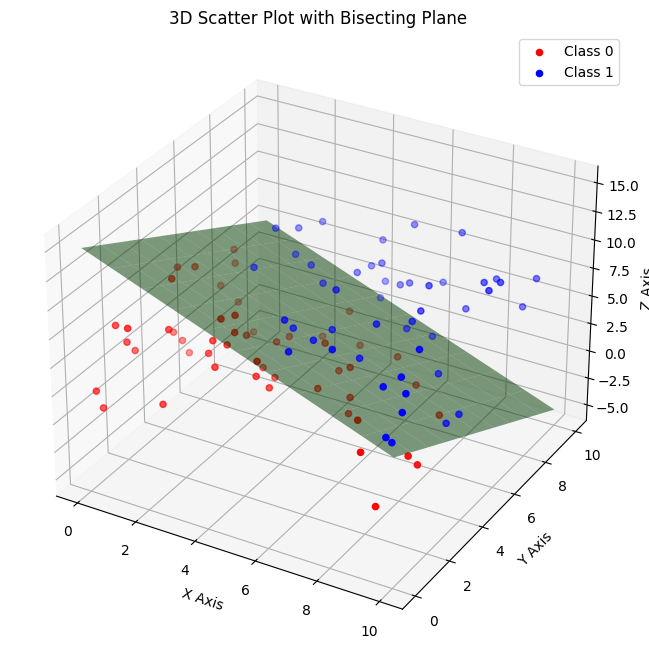

In [ ]:
points, labels = generate_separate_arrays(100, 15)

# Split points into two groups based on their labels
points_class_0 = points[labels == 0]
points_class_1 = points[labels == 1]


# Create a 3D plot without adding the bisecting plane to the legend
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.scatter(points_class_0[:, 0], points_class_0[:, 1], points_class_0[:, 2], color='red', label='Class 0')
ax.scatter(points_class_1[:, 0], points_class_1[:, 1], points_class_1[:, 2], color='blue', label='Class 1')

# Plot the bisecting plane
ax.plot_surface(xx, yy, zz, alpha=0.5, color='green')

# Set labels and title
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Scatter Plot with Bisecting Plane')

# Add a legend for the points only
ax.legend()

# Show the plot
plt.show()


### Forward Propagation:
1. $a^{(1)}=W^{(1)} x$
2. $a^{(2)}=W^{(2)} a^{(1)}$
3. $a^{(3)}=W^{(3)} a^{(2)}$
4. $\hat{y}=W^{(4)} a^{(3)}$

### Backpropagation:
Starting from the output and moving backwards:
1. Gradient w.r.t. the last layer's weights:
$$
\nabla_{W^{(4)}} L=\nabla_{\hat{y}} L \cdot\left(a^{(3)}\right)^T
$$
2. Gradient w.r.t. the third layer's weights:
The gradient of the loss with respect to $a^{(3)}$ is needed first, which is $W^{(4) T} \cdot \nabla_{\hat{y}} L$. Then:
$$
\nabla_{W^{(3)}} L=\left(W^{(4) T} \cdot \nabla_{\hat{y}} L\right) \cdot\left(a^{(2)}\right)^T
$$
3. Gradient w.r.t. the second layer's weights:
Similarly, compute the gradient of the loss with respect to $a^{(2)}$, which is $W^{(3) T} \cdot\left(W^{(4) T} \cdot \nabla_{\hat{y}} L\right)$ . Then:
$$
\nabla_{W^{(2)}} L=\left(W^{(3) T} \cdot W^{(4) T} \cdot \nabla_{\hat{y}} L\right) \cdot\left(a^{(1)}\right)^T
$$
4. Gradient w.r.t. the first layer's weights:
Finally, compute the gradient of the loss with respect to $a^{(1)}$, which is $W^{(2) T} \cdot W^{(3) T} \cdot W^{(4) T}$. $\nabla_{\hat{y}} L$. Then:
$$
\nabla_{W^{(1)}} L=\left(W^{(2) T} \cdot W^{(3) T} \cdot W^{(4) T} \cdot \nabla_{\hat{y}} L\right) \cdot x^T
$$

In [ ]:
# Stochastic Gradient Descent
num_iterations = 100000  # Number of iterations

#initialize weight matrixes:
N = 3
W_1 = np.random.rand(N, N)
W_2 = np.random.rand(N, N)
W_3 = np.random.rand(N, N)
W_4 = np.random.rand(1, 3)

eta = 0.001

for i in range(num_iterations):
    # Randomly select a data point and its label
    idx = np.random.randint(0, len(x_list))
    x = x_list[idx]
    y = y_list[idx]

    # Forward propagation
    a_0 = x
    a_1 = np.dot(W_1, a_0)
    a_2 = np.dot(W_2, a_1)
    a_3 = np.dot(W_3, a_2)
    a_4 = np.dot(W_4, a_3)
    y_hat = a_4[0]

    # Backpropagation
    grad_L_W_4 = grad_L(y_hat, y).reshape(-1, 1) @ a_3.reshape(1, -1)
    grad_L_W_3 = W_4.T @ grad_L(y_hat, y).reshape(-1, 1) @ a_2.reshape(1, -1)
    grad_L_W_2 = W_3.T @ W_4.T @ grad_L(y_hat, y).reshape(-1, 1) @ a_1.reshape(1, -1)
    grad_L_W_1 = W_2.T @ W_3.T @ W_4.T @ grad_L(y_hat, y).reshape(-1, 1) @ a_0.reshape(1, -1)

    # Update weight matrices
    W_1 = mirror_descent_update(W_1, grad_norm_squared_mirror_map, inverse_grad_norm_squared_mirror_map, grad_L_W_1, eta)
    W_2 = mirror_descent_update(W_2, grad_norm_squared_mirror_map, inverse_grad_norm_squared_mirror_map, grad_L_W_2, eta)
    W_3 = mirror_descent_update(W_3, grad_norm_squared_mirror_map, inverse_grad_norm_squared_mirror_map, grad_L_W_3, eta)
    W_4 = mirror_descent_update(W_4, grad_norm_squared_mirror_map, inverse_grad_norm_squared_mirror_map, grad_L_W_4, eta)

# The weight matrices W_1, W_2, W_3, W_4 are now trained.

### Initialize Training Data

In [ ]:
x_list_test_data, y_list_test_data = generate_separate_arrays(100, 15)

### Test Weights

In [ ]:
# Initialize a counter for correct predictions
correct_predictions = 0

# Iterate over the test dataset
for i in range(100):
    x_test = x_list_test_data[i]
    y_test = y_list_test_data[i]

    # Forward propagation
    a_0 = x_test
    a_1 = np.dot(W_1, a_0)
    a_2 = np.dot(W_2, a_1)
    a_3 = np.dot(W_3, a_2)
    a_4 = np.dot(W_4, a_3)
    y_hat = a_4[0]

    # Round the predicted value to the nearest integer
    predicted_label = int(round(y_hat))

    # Compare with the actual label and update the count if correct
    if predicted_label == y_test:
        correct_predictions += 1

    # Optional: print the predicted and actual values
    #print('Predicted: ' + str(predicted_label))
    #print('Actual: ' + str(y_test))

# Calculate the percentage of correct predictions
percentage_correct = (correct_predictions / 100) * 100
print(f'Percentage of Correct Predictions: {percentage_correct}%')


Percentage of Correct Predictions: 81.0%


### Confidence Interval

Using a confidence interval in this context is crucial because it provides a measure of the statistical reliability and precision of the percentage of correct predictions made by the model. While a single percentage can give an idea of model performance, it doesn't convey how this performance might vary due to the randomness inherent in the data sampling process.

In [ ]:
def test_model(x_list_test_data, y_list_test_data, W_1, W_2, W_3, W_4):
    correct_predictions = 0
    for i in range(len(x_list_test_data)):
        x_test = x_list_test_data[i]
        y_test = y_list_test_data[i]

        # Forward propagation
        a_0 = x_test
        a_1 = np.dot(W_1, a_0)
        a_2 = np.dot(W_2, a_1)
        a_3 = np.dot(W_3, a_2)
        a_4 = np.dot(W_4, a_3)
        y_hat = a_4[0]

        predicted_label = int(round(y_hat))
        if predicted_label == y_test:
            correct_predictions += 1

    return correct_predictions / len(x_list_test_data)

# Simulation parameters
num_simulations = 1000
num_test_samples = 100
percent_correct = []

for _ in range(num_simulations):
    # Sample with replacement from the test data
    indices = np.random.choice(range(len(x_list_test_data)), size=num_test_samples, replace=True)
    sampled_x_test = x_list_test_data[indices]
    sampled_y_test = y_list_test_data[indices]

    # Test the model on this sample and store the percentage correct
    percent_correct.append(test_model(sampled_x_test, sampled_y_test, W_1, W_2, W_3, W_4) * 100)

# Calculate the 95% confidence interval
percent_correct = np.array(percent_correct)
confidence_interval = np.percentile(percent_correct, [2.5, 97.5])

print(f"Mean Percentage of Correct Predictions: {np.mean(percent_correct)}%")
print(f"95% Confidence Interval: {confidence_interval[0]}% - {confidence_interval[1]}%")


Mean Percentage of Correct Predictions: 89.102%
95% Confidence Interval: 83.0% - 95.0%
